## Зачетная работа по курсу "Эффективность и надежность химических производств" <br/> студентки группы ТМ-27 <br/> Макарычевой Екатерины <br/>

### Условие задачи

Структура проектируемой системы представляется основной системой, состоящей из 10 элементов «A», 22 элементов «B», 17 элементов «D» и 10 элементов «F». Интенсивности отказов элементов известны и равны: $A = 3 ⋅ 10^{-6} час^{-1}$, $B = 3 ⋅ 10^{-6} час^{-1}$, $D = 3.5 ⋅ 10^{-6} час^{-1}$, $F = 6 ⋅ 10^{-6} час^{-1}.$ <br/>
1. Постройте блок-схему надежности данной системы (одинаковые элементы можно условно объединить в один блок). <br/>
2. Определите среднюю наработку системы до отказа и ВБР системы за наработки: $t_1 = 100$  часов, $t_2 = 1000$ часов и в интервале указанных наработок. <br/>
3. Определите плотность распределения отказов системы при наработке    $t_2 = 1000$ час.<br/>
4. Сравните с помощью графиков показатели надежности элементов и системы.


In [31]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Решение задачи

Основные системы (ОС) являются простейшими техническими системами, в которых отказ одного элемента приводит к отказу всей системы. Работоспособность основной системы обеспечивается при условии, когда все n элементов системы находятся в работоспособном состоянии. <br\>
Распределение наработки до отказа ОС подчиняется экспоненциальному распределению.<br\>
Для ОС надежность меньше надежности каждого из элементов. С увеличением числа элементов надежность ОС уменьшается.

### Блок-схема надежности проектируемой системы

Для отказа системы достаточно отказа одного элемента, поэтому все элементы на блок-схеме надежности должны быть соединены последовательно. 

![Блок-схема](blockshema.png "Блок-схема")

![Блок-схема](oboznacheniya1.png)

На участке нормальной эксплуатации наработку до отказа можно описать экспоненциальным распределением каждого элемента:
$$p_1(t) = e^{-\lambda_i t}, $$ где $\lambda_i$ - интенсивность отказов отдельного элемента.

Для экспоненциального распределения наработки интенсивность отказов — константа. <br/>
Интенсивность отказов для проектируемой системы увеличивается пропорционально числу последовательно соединенных элементов: $$\lambda_{s} = a\lambda_1⋅ b\lambda_2 ⋅d\lambda_3 ⋅f\lambda_4 ,$$  где $a, b, d, f$ — количество последовательно соединенных элементов.


In [32]:
a = 10 #кол-во элементов A
b = 22 #кол-во элементов B
d = 17 #кол-во элементов D
f = 10 #кол-во элементов F

lambda_1 = 3e-6
lambda_2 = 3e-6
lambda_3 = 3.5e-6
lambda_4 = 6e-6

lambda_s = (a*lambda_1+b*lambda_2+d*lambda_3+f*lambda_4) #интенсивность отказа системы

print('Интенсивность отказов проектируемой системы: %.4g' %(lambda_s))

Интенсивность отказов проектируемой системы: 0.0002155


### Средняя наработка до отказа

Для экспоненциального распределения наработки: $$ T = \frac{1}{\lambda}. $$
В данном случае средняя наработка системы до отказа составит: $$ T_s = \frac{1}{a\lambda_1⋅ b\lambda_2 ⋅d\lambda_3 ⋅ f\lambda_4} = \frac{1}{\lambda_{s}},$$  где $a, b, d, f$ — количество идентичных элементов.

In [33]:
T_s = 1/lambda_s
print('Средняя наработка проектируемой системы до отказа : %.0f часов' % (T_s))

Средняя наработка проектируемой системы до отказа : 4640 часов


### Вероятность безотказной работы

In [34]:
def p_1(t):
    return np.exp(-lambda_1 * t)
def p_2(t):
    return np.exp(-lambda_2 * t)
def p_3(t):
    return np.exp(-lambda_3 * t)
def p_4(t):
    return np.exp(-lambda_4 * t)

ВБР идентичных элементов ОС: $p_i^n(t)$ где $n$ — количество одинаковых элементов. <br/>
При последовательном соединении элементов для работоспособности системы необходима работоспособность всех ее элементов. <br/>
Поэтому ВБР системы — произведение ВБР всех элементов: $$P_s(t) = \prod_i p_i(t) = e^{-a\lambda_1 t} ⋅ e^{-b\lambda_2 t} ⋅ e^{-d\lambda_3 t} ⋅ e^{-f\lambda_4 t}$$ <br/>
где $a, b, d, f$ — количество подобных элементов. <br/>
ВБР в интервале времени $(t_1, t_2)$ считаем по формуле условной вероятности $$P_{int} = P(AB)=P(A)\cdot P(B|A)$$ где $A$ - ВБР при $t_1$, $B$ - ВБР при  $t_2$

In [35]:
# Функция для расчета ВБР проектируемой системы

t1 = 100
t2 = 1000

def P_s(t):
    return (p_1(t)**a)*(p_2(t)**b)*(p_3(t)**d)*(p_4(t)**f)

P_int = P_s(t1) * P_s(t2)/P_s(t1)

print('При t = 100 часов - ВБР проектируемой системы: %.4g' %(P_s(t1)))
print('При t = 1000 часов - ВБР проектируемой системы: %.4g' %(P_s(t2)))
print('В интервале наработок от 100 до 1000 часов - ВБР в проектируемой системы: %.4g' %(P_int))

При t = 100 часов - ВБР проектируемой системы: 0.9787
При t = 1000 часов - ВБР проектируемой системы: 0.8061
В интервале наработок от 100 до 1000 часов - ВБР в проектируемой системы: 0.8061


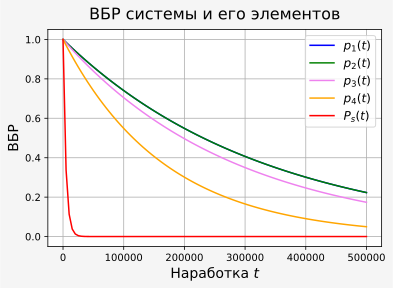

In [36]:
# График ВБР

figsize = (6, 4);
fig = plt.figure(figsize = figsize, facecolor = 'whitesmoke', frameon = True);

t = np.linspace(0, 500000, 100)


plt.plot(t, p_1(t), color = 'b', label=r'$p_1(t)$') #ВБР элемента A
plt.plot(t, p_2(t),  color = 'green', label=r'$p_2(t)$') #ВБР элемента B
plt.plot(t, p_3(t), color = 'violet', label=r'$p_3(t)$') #ВБР элемента D
plt.plot(t, p_4(t), color = 'orange', label=r'$p_4(t)$') #ВБР элемента F
plt.plot(t, P_s(t), color = 'red', label=r'$P_{s}(t)$') #ВБР проектируемой системы

plt.grid();
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.title('ВБР системы и его элементов', y=1.02, fontsize=16);

Вывод: <br/>
При последовательном соединении ВБР системы меньше ВБР его элементов. <br/>
Также по графику видно, что $p_1(t)$  и  $p_2 (t)$ совпали, отсюда следует, что они равны.

### Плотность распределения отказов

Плотность распределения отказов (ПРО) по определению есть: $$f(t) = \frac{\mathrm dF(t)}{\mathrm dt} = \frac{\mathrm d(1-P(t))}{\mathrm dt} = - \frac{\mathrm dP(t)}{\mathrm dt}$$

В данном случае плотность для каждого элемента несложно найти аналитически:

$$f_1(t) = -\left( e^{-\lambda_1 t} \right)' = \lambda_1 e^{-\lambda_1 t}$$
$$f_2(t) = -\left( e^{-\lambda_2 t} \right)' = \lambda_2 e^{-\lambda_2 t}$$
$$f_3(t) = -\left( e^{-\lambda_3 t} \right)' = \lambda_3 e^{-\lambda_3 t}$$
$$f_4(t) = -\left( e^{-\lambda_4 t} \right)' = \lambda_4 e^{-\lambda_4 t}$$

In [37]:
f_1 = lambda t: lambda_1 * p_1(t) #функция ПРО элемента A
f_2 = lambda t: lambda_2 * p_2(t) #функция ПРО элемента B
f_3 = lambda t: lambda_3 * p_3(t) #функция ПРО элемента D
f_4 = lambda t: lambda_4 * p_4(t) #функция ПРО элемента F

ПРО системы:
$$f_s(t) = \frac{\mathrm dF(t)}{\mathrm dt} = \frac{\mathrm d(1-P_s(t))}{\mathrm dt} = - \frac{\mathrm dP_s(t)}{\mathrm dt}$$

In [38]:
# ПРО проектируемой системы

def f_s(t):
    step = 1.0
    return -derivative(P_s, t, dx=step)

print('При t = 1000 часов - плотность распределения отказов проектируемой системы: %.4g' %(f_s(t2)))

При t = 1000 часов - плотность распределения отказов проектируемой системы: 0.0001737


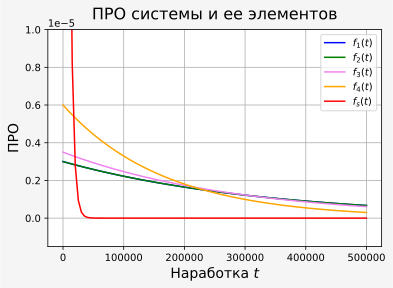

In [39]:
# График ПРО

figsize = (6, 4);
fig = plt.figure(figsize = figsize, facecolor = 'whitesmoke', frameon = True);

t = np.linspace(0, 500000, 100)


plt.plot(t, f_1(t), color = 'b', label=r'$f_1(t)$') #ВБР элемента A
plt.plot(t, f_2(t),  color = 'green', label=r'$f_2(t)$') #ВБР элемента B
plt.plot(t, f_3(t), color = 'violet', label=r'$f_3(t)$') #ВБР элемента D
plt.plot(t, f_4(t), color = 'orange', label=r'$f_4(t)$') #ВБР элемента F
plt.plot(t, f_s(t), color = 'red', label=r'$f_{s}(t)$') #ВБР проектируемой системы

plt.grid();
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ПРО', fontsize=14)
plt.legend(loc='best')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.ylim(ymax=0.00001, ymin=-0.0000015)
plt.title('ПРО системы и ее элементов', y=1.02, fontsize=16);

Вывод: <br\>
При последовательном соединении плотность распределения отказов для этой системы более сконцентрирована в области малых наработок, чем плотность распределения отказов для отдельных элементов.

### Интенсивность отказов

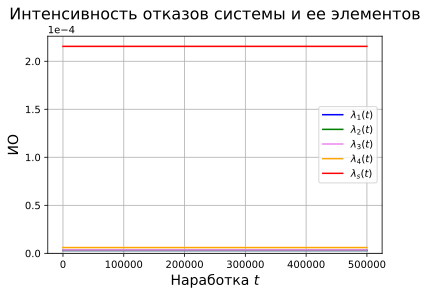

In [40]:
# График интенсивности  отказов для элемента и системы
t = np.linspace(0, 500000, 100)

o = np.ones(len(t)) 
#вспомогательный массив, функция plot не может построить график, если размерности массивов абсцисс и ординат не совпадают


plt.plot(t, o * lambda_1, color = 'b', label=r'$\lambda_1(t)$') #интенсивность отказов элемента A
plt.plot(t, o * lambda_2, color = 'green', label=r'$\lambda_2(t)$') #интенсивность отказов элемента B
plt.plot(t, o * lambda_3, color = 'violet', label=r'$\lambda_3(t)$') #интенсивность отказов элемента D
plt.plot(t, o * lambda_4, color = 'orange', label=r'$\lambda_4(t)$') #интенсивность отказов элемента F
plt.plot(t, o * lambda_s, color = 'red', label=r'$\lambda_s(t)$') #интенсивность отказов проектируемой системы

plt.grid();
plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ИО', fontsize=14)
plt.legend(loc='best')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.ylim(ymin=0)
plt.title('Интенсивность отказов системы и ее элементов', y=1.05, fontsize=16);


Вывод: <br\> 
При последовательном соединении элементов с экспоненциальной наработкой получается также экспоненциальное распределение наработки до отказа. Интенсивность отказов для системы - константа. Ее значение растет пропорционально числу последовательно соединенных элементов. В данном случае интенсивность отказов системы примерно в 2 раза выше интенсивности отказов отдельного элемента.